In [2]:
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.common.by import By

from selenium.webdriver.chrome.options import Options
import time
import json

In [3]:
link = "https://www.instagram.com/"

In [4]:
# Disable Chrome Browser Notification
option = Options()
option.add_argument("start-maximized")

In [5]:
driver = webdriver.Chrome(options = option)
driver.get(link)

The chromedriver version (122.0.6261.94) detected in PATH at c:\Users\Aman\Documents\GitHub\Data_Science\WebScrapping\Project\chromedriver.exe might not be compatible with the detected chrome version (123.0.6312.86); currently, chromedriver 123.0.6312.86 is recommended for chrome 123.*, so it is advised to delete the driver in PATH and retry


#### LOGIN INTO THE INSTAGRAM ACCOUNT

In [ ]:
# Login into the instagram account
UserName = WebDriverWait(driver, 10).until(
    ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/section/main/article/div[2]/div[1]/div[2]/form/div/div[1]/div/label/input'))
)
Password = WebDriverWait(driver, 10).until(
    ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/section/main/article/div[2]/div[1]/div[2]/form/div/div[2]/div/label/input'))
)

UserName.send_keys("************")
Password.send_keys("************")

ClickLogIn = WebDriverWait(driver, 10).until(
    ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/section/main/article/div[2]/div[1]/div[2]/form/div/div[3]'))
).click()

time.sleep(5)

In [7]:
clickNotNow = WebDriverWait(driver,10).until(
    ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[2]/section/main/div/div/div/div/div'))
).click()
time.sleep(2)


In [8]:
NotTurningTheNotification = WebDriverWait(driver, 10).until(
    ec.presence_of_element_located((By.XPATH,'/html/body/div[3]/div[1]/div/div[2]/div/div/div/div/div[2]/div/div/div[3]/button[2]'))
).click()

##### From the list of instagram handles you obtained when you searched 'food' in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [61]:
SearchButton = WebDriverWait(driver, 10).until(
    ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a/div'))
).click()
time.sleep(1)
searchDetail = WebDriverWait(driver, 10).until(
    ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input'))
)
searchDetail.send_keys('food')
time.sleep(3)
# Getting all the instagram handel
data = WebDriverWait(driver,10).until(
    ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[2]/div'))
)
InstagramHandel = []
for i in data.find_elements('tag name','a'):
    name = i.text.split('\n')[0]
    if name == "":
        continue
    elif name[0] == '#':
        continue
    InstagramHandel.append(name)
InstagramHandel = InstagramHandel[:10]
Dictionary = {}
time.sleep(4)
GoingHomePage = WebDriverWait(driver,10).until(
    ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[1]/div/span/div/a/div'))
).click()
time.sleep(1)

# Getting the count of the Instagram Handles
for i in InstagramHandel:
    ClickSearchButton = WebDriverWait(driver, 10).until(
        ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]'))
    ).click()
    time.sleep(2)
    searchForTheInstagramHandel = WebDriverWait(driver, 10).until(
        ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input'))
    ).send_keys(i)
    time.sleep(2)
    OpeningTheProfile = WebDriverWait(driver, 10).until(
    ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[2]/div/a[1]/div[1]/div/div/div[2]/div/div'))
    ).click()
    time.sleep(2)
    GettingTheDetail = WebDriverWait(driver, 10).until(
    ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[2]/div[2]/section/main/div/header/section/ul/li[2]/a'))
    )
    def getFollowers(value):
        allowed_character = set("1234567890.-+KM")
        return "".join(i for i in value if i in allowed_character)
    ans = getFollowers(GettingTheDetail.text)
    if i not in Dictionary:
        Dictionary[i] = ans
    time.sleep(2)
Dictionary

{'foodie_incarnate': '2M',
 'foodiesince96': '336K',
 'foodpharmer': '1.9M',
 'foodrooaster': '347K',
 'foodiee_ishh': '14.8K',
 'dehradunfoodguide': '1338',
 'food': '2M',
 '_foodie_from_dun': '8318',
 'ghumakkad___foodie': '8318',
 'chatori_anshiiiiiii': '5582'}

In [62]:
data = Dictionary.keys()
for i in data:
    value = Dictionary[i]
    if value[-1] == 'M':
        value = value[:-1]
        value = float(value)
        value = value*1000000
        Dictionary[i] = value
    elif value[-1] == "K":
        value = value[:-1]
        value = float(value)
        value = value*1000
        Dictionary[i] = value

In [63]:
import pandas as pd
InstagramData = pd.DataFrame.from_dict(Dictionary, orient='index')
InstagramData.columns = ['SubscriberCount']
InstagramData['SubscriberCount'] = InstagramData['SubscriberCount'].astype(float)
InstagramData.sort_values(by = 'SubscriberCount',ascending= False,inplace=True)
print("Top 5 User Handel are : ")
InstagramData.head(5)

Top 5 User Handel are : 


,SubscriberCount
foodie_incarnate,2000000.0
food,2000000.0
foodpharmer,1900000.0
foodrooaster,347000.0
foodiesince96,336000.0


In [64]:
print("Top 5 User Handel are : ")
InstagramData.head(5)

Top 5 User Handel are : 


,SubscriberCount
foodie_incarnate,2000000.0
food,2000000.0
foodpharmer,1900000.0
foodrooaster,347000.0
foodiesince96,336000.0


In [55]:
InstagramData.index

Index(['foodie_incarnate', 'food', 'foodpharmer', 'foodpandits',
       'foodrooaster', 'foodiesince96', 'kashmirfoodgram', 'oyefoodiesingh',
       'foodineerishita', 'foodiepragun'],
      dtype='object')

In [56]:
Handles = InstagramData.index
data = []

In [58]:
for i in Handles:
    time.sleep(2)
    SearchForProfile = WebDriverWait(driver, 10).until(
        ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a/div'))
    ).click()
    time.sleep(2)
    OpenProfile = WebDriverWait(driver,10).until(
        ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input'))
    ).send_keys(i)
    time.sleep(2)
    OpeningProfile = WebDriverWait(driver, 10).until(
        ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[2]/div/a[1]'))
    ).click()
    time.sleep(2)
    CheckingPosts = WebDriverWait(driver, 10).until(
        ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[2]/div[2]/section/main/div/div[3]/div/div[1]/div[1]'))
    ).click()
    count = 0
    TotalPosts = 0
    while True:
        time.sleep(2)
        if count == 0:
            GettingDateAndTime = WebDriverWait(driver,10).until(
                ec.presence_of_element_located((By.XPATH,'/html/body/div[8]/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[2]/div'))
            )
        else:
            GettingDateAndTime = WebDriverWait(driver,10).until(
                ec.presence_of_element_located((By.XPATH,'/html/body/div[7]/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[2]/div'))
            )
        time.sleep(2)
        def getInfo(text):
            day = (text.split(' ')[0])
            try:
                day = int(day)
            except:
                return 0
            Month = text.split(' ')[1]
            if day > 3 and Month in ['hours']:
                return 1
            if day > 3 or Month not in ['day', 'days']:
                return 0
            return 1
        string = GettingDateAndTime.text
        ans = getInfo(string)
        if ans == 0:
            print(i,'did Total',TotalPosts,' in Past Three Days')
            data.append(TotalPosts)
            break
        else:
            if count == 0:
                TotalPosts += 1
                NextPost = WebDriverWait(driver, 10).until(
                    ec.presence_of_element_located((By.XPATH,'/html/body/div[8]/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button'))
                ).click()
                count += 1
            else:
                TotalPosts += 1
                NextPost = WebDriverWait(driver, 10).until(
                    ec.presence_of_element_located((By.XPATH,'/html/body/div[7]/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button'))
                ).click()
                count += 1
    if count == 0:
        closePosts = WebDriverWait(driver, 10).until(
            ec.presence_of_element_located((By.XPATH,'/html/body/div[8]/div[1]/div/div[2]/div'))
        ).click()
    else:
        closePosts = WebDriverWait(driver,10).until(
            ec.presence_of_element_located((By.XPATH,'/html/body/div[7]/div[1]/div/div[2]/div'))
        ).click()


foodie_incarnate did Total 1  in Past Three Days
food did Total 1  in Past Three Days
foodpharmer did Total 0  in Past Three Days
foodpandits did Total 0  in Past Three Days
foodrooaster did Total 0  in Past Three Days
foodiesince96 did Total 0  in Past Three Days
kashmirfoodgram did Total 8  in Past Three Days
oyefoodiesingh did Total 7  in Past Three Days
foodineerishita did Total 0  in Past Three Days
foodiepragun did Total 0  in Past Three Days


In [11]:
import matplotlib.pyplot as plt

In [61]:
InstagramData.insert(1,'TotalPost',data,True)

In [62]:
InstagramData.sort_values(by='TotalPost',ascending=False,inplace=True)
InstagramData.head(5)

,SubscriberCount,TotalPost
kashmirfoodgram,213000.0,8
oyefoodiesingh,115000.0,7
foodie_incarnate,1900000.0,1
food,1900000.0,1
foodpharmer,1800000.0,0


In [63]:
Names = InstagramData.index
Names = Names[:5]
Names

Index(['kashmirfoodgram', 'oyefoodiesingh', 'foodie_incarnate', 'food',
       'foodpharmer'],
      dtype='object')

In [64]:
TotalPostIn3Days = InstagramData['TotalPost']
TotalPostIn3Days = TotalPostIn3Days[:5]
TotalPostIn3Days

kashmirfoodgram     8
oyefoodiesingh      7
foodie_incarnate    1
food                1
foodpharmer         0
Name: TotalPost, dtype: int64

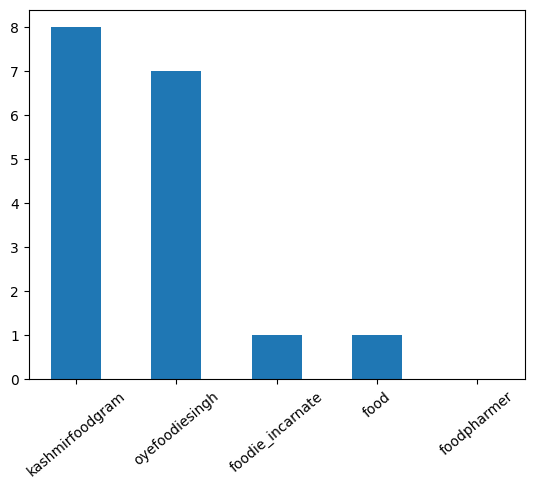

In [65]:
plt.bar(Names,TotalPostIn3Days,width = 0.5)
plt.xticks(rotation=40)
plt.show()

#### Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.


In [66]:
Handles = InstagramData.index
Handles

Index(['kashmirfoodgram', 'oyefoodiesingh', 'foodie_incarnate', 'food',
       'foodpharmer', 'foodpandits', 'foodrooaster', 'foodiesince96',
       'foodineerishita', 'foodiepragun'],
      dtype='object')

In [70]:
dataDictionary = {}
for i in Handles:
    time.sleep(2)
    SearchForProfile = WebDriverWait(driver, 10).until(
        ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a/div'))
    ).click()
    time.sleep(2)
    OpenProfile = WebDriverWait(driver,10).until(
        ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input'))
    ).send_keys(i)
    time.sleep(2)
    OpeningProfile = WebDriverWait(driver, 10).until(
        ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[2]/div/a[1]'))
    ).click()
    time.sleep(3)
    CheckingPosts = WebDriverWait(driver, 10).until(
        ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[2]/div[2]/section/main/div/div[3]/div/div[1]/div[1]'))
    ).click()
    time.sleep(2)
    count = 0
    stringData = []
    while count < 10:
        if count == 0:
            try:
                dataString = WebDriverWait(driver, 10).until(
                    ec.presence_of_all_elements_located((By.XPATH,'/html/body/div[8]/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul'))
                )
                stringData.append(dataString[0].text)
            except:
                dataString = WebDriverWait(driver,10).until(
                ec.presence_of_all_elements_located((By.XPATH,'/html/body/div[7]/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul'))
            )
                stringData.append(dataString[0].text)
            time.sleep(2)
            try:
                NextPost = WebDriverWait(driver, 10).until(
                    ec.presence_of_element_located((By.XPATH,'/html/body/div[8]/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button'))
                ).click()
            except:
                NextPost = WebDriverWait(driver, 10).until(
                    ec.presence_of_element_located((By.XPATH,'/html/body/div[7]/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button'))
                ).click()
            count += 1
        else:
            try:
                dataString = WebDriverWait(driver,10).until(
                    ec.presence_of_all_elements_located((By.XPATH,'/html/body/div[7]/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul'))
                )
                stringData.append(dataString[0].text)
            except:
                dataString = WebDriverWait(driver, 10).until(
                    ec.presence_of_all_elements_located((By.XPATH,'/html/body/div[8]/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul'))
                )
                stringData.append(dataString[0].text)
            time.sleep(2)
            try:
                NextPost = WebDriverWait(driver, 10).until(
                    ec.presence_of_element_located((By.XPATH,'/html/body/div[7]/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button'))
                ).click()
            except:
                NextPost = WebDriverWait(driver, 10).until(
                    ec.presence_of_element_located((By.XPATH,'/html/body/div[8]/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button'))
                ).click()
            count += 1
    dataDictionary[i] = stringData
    try:
        closePosts = WebDriverWait(driver,10).until(
                ec.presence_of_element_located((By.XPATH,'/html/body/div[7]/div[1]/div/div[2]/div'))
        ).click()
    except:
        closePosts = WebDriverWait(driver, 10).until(
            ec.presence_of_element_located((By.XPATH,'/html/body/div[8]/div[1]/div/div[2]/div'))
        ).click()


In [2]:
dict = {}

for i in dataDictionary:
    for j in dataDictionary[i]:
        word = j
        words = word.split("\n")
        for i in words:
            string = i.split()
            for j in string:
                if j[0] == '#':
                    if j in dict:
                        dict[j] += 1
                    else:
                        dict[j] = 1
                    dict[j] == 1


In [3]:
import pandas as pd

In [4]:
data = pd.DataFrame(dict.items(),columns=['HashTag','Frequency'])
data.sort_values(by='Frequency',ascending=False,inplace=True)
data = data.reset_index(drop = True)
data

,HashTag,Frequency
0,#streetfood,32
1,#reelitfeelit,26
2,#reels,26
3,#reelsinstagram,25
4,#foodblogger,23
...,...,...
264,#gymlover,1
265,#motivation,1
266,#foodvlogers,1
267,#remix,1


In [5]:
# Saving the dataFrame as the file name data
data.to_csv('data.csv')

In [107]:
import matplotlib.pyplot as plt

In [18]:
newData = data[:5]
newData

,HashTag,Frequency
0,#streetfood,32
1,#reelitfeelit,26
2,#reels,26
3,#reelsinstagram,25
4,#foodblogger,23


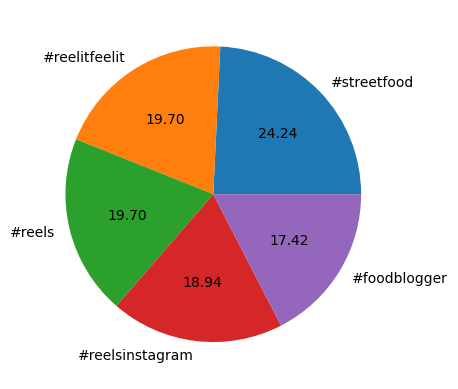

In [16]:
plt.pie(newData['Frequency'],labels=newData['HashTag'],autopct='%.2f')
plt.show()

In [9]:
newHandel = Handles[:5]

In [11]:
newDataDictionary = {}
for i in newHandel:
    time.sleep(2)
    SearchForProfile = WebDriverWait(driver, 10).until(
        ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a/div'))
    ).click()
    time.sleep(2)
    OpenProfile = WebDriverWait(driver,10).until(
        ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input'))
    ).send_keys(i)
    time.sleep(2)
    OpeningProfile = WebDriverWait(driver, 10).until(
        ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[2]/div/a[1]'))
    ).click()
    time.sleep(3)
    CheckingPosts = WebDriverWait(driver, 10).until(
        ec.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[2]/div[2]/section/main/div/div[3]/div/div[1]/div[1]'))
    ).click()
    time.sleep(2)
    count = 0
    TotalLikes  = []
    while count < 10:
        if count == 0:
            try:
                likedPost = WebDriverWait(driver,10).until(
                    ec.presence_of_element_located((By.XPATH,'/html/body/div[8]/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div'))
                ).text
                TotalLikes.append(likedPost)
            except:
                likedPost = WebDriverWait(driver,10).until(
                ec.presence_of_all_elements_located((By.XPATH,'/html/body/div[7]/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div'))
            )
                TotalLikes.append(likedPost[0].text)
            time.sleep(2)
            try:
                NextPost = WebDriverWait(driver, 10).until(
                    ec.presence_of_element_located((By.XPATH,'/html/body/div[8]/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button'))
                ).click()
            except:
                NextPost = WebDriverWait(driver, 10).until(
                    ec.presence_of_element_located((By.XPATH,'/html/body/div[7]/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button'))
                ).click()
            count += 1
        else:
            try:
                likedPost = WebDriverWait(driver,10).until(
                    ec.presence_of_all_elements_located((By.XPATH,'/html/body/div[7]/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div'))
                )
                TotalLikes.append(likedPost[0].text)
            except:
                likedPost = WebDriverWait(driver, 10).until(
                    ec.presence_of_all_elements_located((By.XPATH,'/html/body/div[8]/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div'))
                )
                TotalLikes.append(likedPost[0].text)
            time.sleep(2)
            try:
                NextPost = WebDriverWait(driver, 10).until(
                    ec.presence_of_element_located((By.XPATH,'/html/body/div[7]/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button'))
                ).click()
            except:
                NextPost = WebDriverWait(driver, 10).until(
                    ec.presence_of_element_located((By.XPATH,'/html/body/div[8]/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button'))
                ).click()
            count += 1
    newDataDictionary[i] = TotalLikes
    try:
        closePosts = WebDriverWait(driver, 10).until(
                ec.presence_of_element_located((By.XPATH,'/html/body/div[7]/div[1]/div/div[2]/div'))
        ).click()
    except:
        closePosts = WebDriverWait(driver, 10).until(
            ec.presence_of_element_located((By.XPATH,'/html/body/div[8]/div[1]/div/div[2]/div'))
        ).click()

In [34]:
newDataDictionary
name = newDataDictionary.keys()
for data in name:
    array = newDataDictionary[data]
    count = 0
    for char in array:
        def remove(char):
            acceptable = set("1234567890")
            return "".join(i for i in char if i in acceptable)
        newDataDictionary[data][count] = int(remove(char))
        count += 1

In [44]:
# GETTING THE average like for the handel
newDataDictionary
names = newDataDictionary.keys()
for i in names:
    # Dividing by 10 for getting the average for the 10 posts
    newDataDictionary[i] = newDataDictionary[i]//10

In [45]:
newDataDictionary

{'kashmirfoodgram': 2289,
 'oyefoodiesingh': 3169,
 'foodie_incarnate': 8754039,
 'food': 8754039,
 'foodpharmer': 148319851}

In [100]:
InstagramData.index
for i in InstagramData.index:
    if i in newDataDictionary:
        newDataDictionary[i] = newDataDictionary[i]/InstagramData._get_value('foodie_incarnate','SubscriberCount')

In [148]:
print("Sub:likes ratio : ")
newDataDictionary

Sub:likes ratio : 


{'kashmirfoodgram': 2289,
 'oyefoodiesingh': 3169,
 'foodie_incarnate': 4.3770195,
 'food': 4.3770195,
 'foodpharmer': 74.1599255}

In [149]:
names = []
for i in newDataDictionary.keys():
    names.append(i)
values = []
for i in newDataDictionary.values():
    values.append(i)
printValues = values

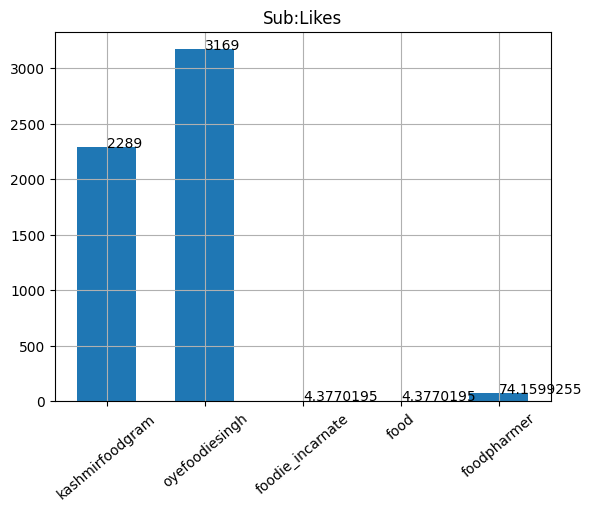

In [150]:
plt.bar(names,values,width = 0.6)
plt.title('Sub:Likes')
plt.xticks(rotation=40)
for i in range(0,len(values)):
    plt.text(names[i],values[i],printValues[i])
plt.grid()
plt.show()